<a href="https://colab.research.google.com/github/phani1729/Income-Prediction-using-XGBOOST/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
# MNIST Handwritten images detection using CNN (Deep Learning)

---




In [1]:
# Collect data
from tensorflow.examples.tutorials.mnist import input_data
MNIST=input_data.read_data_sets('MNIST_data',one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
ls

MNIST_data/  sample_data/


**Collect data**

**Training and Test data**

In [0]:
# Training dataset
trainX=MNIST.train.images
trainY=MNIST.train.labels

#Test Data
testX=MNIST.test.images
testY=MNIST.test.labels

**Shape of the data**

In [4]:
print('Training X size:',trainX.shape)
print('Training Y size:',trainY.shape)     #One hot encoded labels

print('Test X size:',testX.shape)
print('Test Y size:',testY.shape)


Training X size: (55000, 784)
Training Y size: (55000, 10)
Test X size: (10000, 784)
Test Y size: (10000, 10)


**How the data looks like?**

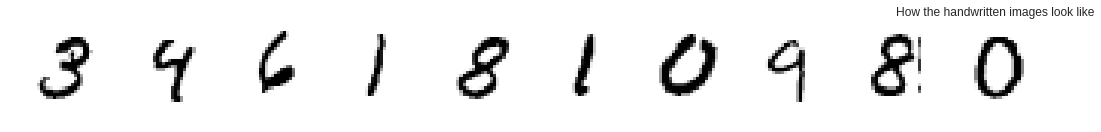

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[20,5])

plt.subplots_adjust(hspace=0.2,wspace=0.2)

for i in range(1,11):
  plt.subplot(1,11,i)
  #plt.grid(axis=False)
  plt.axis('off')
  plt.imshow(np.reshape(trainX[i],(28,28)))
  
plt.title('How the handwritten images look like')  
plt.show()


**Set Random seed**

In [0]:
np.random.seed(42)

# Build the graph

**Using Keras to build the model**


****Network Architecture****
![alt text](https://raw.githubusercontent.com/sayakgis/Handwritten_Digit_Prediction_DL/master/Network.JPG)


In [0]:
#Sequential model
from tensorflow.keras.models import Sequential

#Import Keras Layers
from tensorflow.keras.layers import MaxPool2D, Conv2D,Dense,Dropout,Reshape,Flatten

#Model Check point and Tensor board
from tensorflow.keras.callbacks import  ModelCheckpoint,TensorBoard

**Start a Sequential Model**

In [0]:
model=Sequential()

**Input (Reshape the Data)**

In [0]:
model.add(Reshape((28,28,1),input_shape=(784,)))

**Add First Convolution Layer** (32 filters, with 3 by 3 kernel and stride of 1)

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'))

**Add Second Convolution layer**(64 filters with 3 by 3 kernel and stride of 1)

In [0]:
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))

**Add Max Pooling Layer **(2 by 2)

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

**Add Drop Out of 25%**

In [0]:
model.add(Dropout(rate=0.25))

**Flatten the image **

In [0]:
model.add(Flatten())

**Add fully connected layer (128 neurons)**

In [0]:
model.add(Dense(units=128,activation='relu'))

**Add another Drop Out (50%)**

In [0]:
model.add(Dropout(0.50))

**Add Softmax**

In [0]:
model.add(Dense(10,activation='softmax'))

**Compile the model**

In [0]:
from tensorflow.keras import optimizers
Adam = optimizers.Adam(lr=0.00099, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Define Checkpoint based on Best accuracy of test data**

In [0]:
checkpoint=ModelCheckpoint('mnist_keras_cnn-v1',monitor='val_acc',verbose=1,save_best_only=True,mode='max')

**Train and execute the graph**

In [21]:
model.fit(x=trainX,y=trainY,batch_size=100,epochs=30,validation_data=[testX,testY],callbacks=[checkpoint,TensorBoard(log_dir='')])

Train on 55000 samples, validate on 10000 samples
Epoch 1/30
54700/55000 [============================>.] - ETA: 0s - loss: 0.2471 - acc: 0.9245
Epoch 00001: val_acc improved from -inf to 0.98450, saving model to mnist_keras_cnn-v1
55000/55000 [==============================] - 12s 216us/step - loss: 0.2464 - acc: 0.9247 - val_loss: 0.0498 - val_acc: 0.9845
Epoch 2/30
54800/55000 [============================>.] - ETA: 0s - loss: 0.0913 - acc: 0.9727
Epoch 00002: val_acc improved from 0.98450 to 0.98630, saving model to mnist_keras_cnn-v1
55000/55000 [==============================] - 9s 160us/step - loss: 0.0912 - acc: 0.9728 - val_loss: 0.0400 - val_acc: 0.9863
Epoch 3/30
54700/55000 [============================>.] - ETA: 0s - loss: 0.0658 - acc: 0.9800
Epoch 00003: val_acc improved from 0.98630 to 0.98900, saving model to mnist_keras_cnn-v1
55000/55000 [==============================] - 9s 161us/step - loss: 0.0657 - acc: 0.9800 - val_loss: 0.0327 - val_acc: 0.9890
Epoch 4/30
54900

**Predict the images**

Predicted Number of picture 822 is==> 7
Predicted Number of picture 6723 is==> 4
Predicted Number of picture 5311 is==> 9
Predicted Number of picture 6192 is==> 1
Predicted Number of picture 3618 is==> 9
Predicted Number of picture 7303 is==> 1
Predicted Number of picture 135 is==> 1
Predicted Number of picture 7685 is==> 2
Predicted Number of picture 6691 is==> 6
Predicted Number of picture 5282 is==> 2


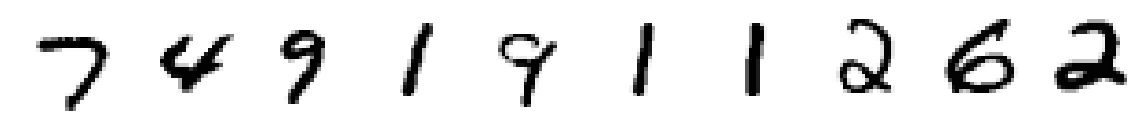

In [22]:
y_pred=model.predict(testX)


plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1,wspace=0.1)

array_=np.random.randint(1,8000,11)

for i,j in zip(array_,range(1,11)):
  plt.subplot(1,10,j)
  print('Predicted Number of picture',i,'is==>',np.argmax(y_pred[i]))
  plt.imshow(np.reshape(testX[i],(28,28)))
  plt.axis('off')
  

**Lets check some wrong predictions**

In [0]:
import pandas as pd

In [24]:
df_compare=pd.DataFrame([np.argmax(y_pred,axis=1),np.argmax(testY,axis=1)]).T
df_compare.head()

,0,1
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [25]:
df_wrong=df_compare[df_compare[0]!=df_compare[1]]
print('Number of wrong predictions:',df_wrong.shape[0])

Number of wrong predictions: 66


Predicted Number of picture number: 259 is==> 0
Predicted Number of picture number: 340 is==> 3
Predicted Number of picture number: 449 is==> 5
Predicted Number of picture number: 938 is==> 5
Predicted Number of picture number: 947 is==> 9
Predicted Number of picture number: 1014 is==> 5
Predicted Number of picture number: 1112 is==> 6
Predicted Number of picture number: 1226 is==> 2
Predicted Number of picture number: 1232 is==> 4
Predicted Number of picture number: 1242 is==> 9


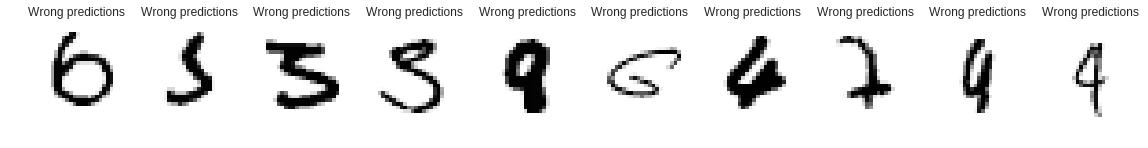

In [26]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1,wspace=0.1)

ind=np.array(df_wrong.index[1:11])


for i, j in zip(ind,range(1,11)):
  plt.subplot(1,10,j)
  print('Predicted Number of picture number:',i,'is==>',np.argmax(y_pred[i]))
  plt.imshow(np.reshape(testX[i],(28,28)))
  plt.axis('off')
  plt.title('Wrong predictions')